In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the dataset into a DataFrame
df = pd.read_csv("/content/Heart.csv")

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Drop columns with missing values
df.dropna(axis=1,inplace=True)

In [ ]:
# Split the dataset into input features (x) and target variable (y)
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:

x.shape

(4240, 8)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scale the input features using StandardScaler
sc=StandardScaler()

In [ ]:
#Scale the input features using StandardScaler
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression
model = LogisticRegression(penalty='l2')
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:

y_pred = model.predict(x_test)

In [ ]:
# Evaluate Logistic Regression using confusion matrix, accuracy, and F1-score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1177,   12],
       [ 200,   11]])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# Evaluate Logistic Regression using confusion matrix, accuracy, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

Accuracy: 0.8485714285714285
F1-score: 0.5056991159875026


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
# Gaussian Naive Bayes
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [ ]:
# Evaluate Gaussian Naive Bayes using accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

Accuracy: 0.8257142857142857
F1-score: 0.5873917748917749


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dc = DecisionTreeClassifier()

In [ ]:
# Decision Tree Classifier
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

Accuracy: 0.8485714285714285
F1-score: 0.5056991159875026


In [ ]:
from sklearn import tree

[Text(0.5106263557160564, 0.9821428571428571, 'x[1] <= -0.124\ngini = 0.258\nsamples = 2840\nvalue = [2407, 433]'),
 Text(0.26874562992626494, 0.9464285714285714, 'x[6] <= 2.714\ngini = 0.143\nsamples = 1397\nvalue = [1289, 108]'),
 Text(0.20644625603864733, 0.9107142857142857, 'x[6] <= 0.018\ngini = 0.137\nsamples = 1390\nvalue = [1287, 103]'),
 Text(0.11935863208746504, 0.875, 'x[7] <= 1.392\ngini = 0.111\nsamples = 1035\nvalue = [974, 61]'),
 Text(0.11732456140350878, 0.8392857142857143, 'x[6] <= -2.189\ngini = 0.109\nsamples = 1034\nvalue = [974, 60]'),
 Text(0.11529049071955251, 0.8035714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11935863208746504, 0.8035714285714286, 'x[1] <= -0.826\ngini = 0.108\nsamples = 1033\nvalue = [974, 59]'),
 Text(0.04106280193236715, 0.7678571428571429, 'x[0] <= 0.143\ngini = 0.081\nsamples = 591\nvalue = [566, 25]'),
 Text(0.018052377320111872, 0.7321428571428571, 'x[2] <= -0.023\ngini = 0.054\nsamples = 327\nvalue = [318, 9]'),
 Te

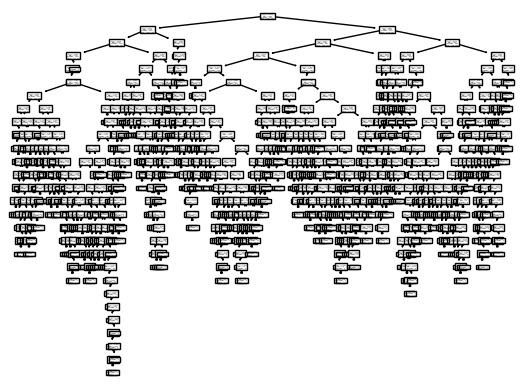

In [ ]:
# Plot the decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Train the model
rfc.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Evaluate Random Forest Classifier using accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

Accuracy: 0.8485714285714285
F1-score: 0.7932884141925453
